# MODULES IMPORT

In [1]:
import numpy as np              #numpy library is used to work with multidimensional array.
import pandas as pd             #panda used for data manipulation and analysis.
                 
import os                       #os library is used for loading file to use in the program
import json                     #json library parses json into a string or dict, and convert string or dict to json file.
from pathlib import Path        #support path

import matplotlib.pyplot as plt #support ploting a figure
from matplotlib import colors   #colors support converting number or argument into colors

In [2]:
import tensorflow as tf

# DATA IMPORT

In [3]:
# get the path for training_task, evaluation_task, and test_task
data_path = Path('./data')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'

#from the path above, we load the tests file's directory into our training_tasks, evaluation_tasks, and test_tasks variables
#the sorted() function is just for the list of directory to maintain some order
training_tasks = sorted(os.listdir(training_path))
evaluation_tasks = sorted(os.listdir(evaluation_path))
test_tasks = sorted(os.listdir(test_path))

print("Number of examples in training corpus is ",len(training_tasks))
print("Number of examples in evaluation corpus is ",len(evaluation_tasks))
print("Number of examples in testing corpus is ",len(test_tasks))

Number of examples in training corpus is  400
Number of examples in evaluation corpus is  400
Number of examples in testing corpus is  100


In [4]:
print(training_tasks[:3])     #printing the first 3 elements of training_tasks
print(evaluation_tasks[:3])   #printing the first 3 elements of evaluation_tasks
print(test_tasks[:3])         #printing the first 3 elements of test_tasks

['007bbfb7.json', '00d62c1b.json', '017c7c7b.json']
['00576224.json', '009d5c81.json', '00dbd492.json']
['00576224.json', '009d5c81.json', '00dbd492.json']


In [5]:
#Get the first file of the training_tasks
training_task_file = str(training_path / training_tasks[0])

#Get the first file of the evaluation_tasks
evaluation_task_file = str(evaluation_path / evaluation_tasks[0])

#Get the first file of the test_tasks
test_task_file = str(test_path / test_tasks[0])

#open the file and load it
with open(training_task_file, 'r') as f:   
    #can change training_task_file to evaluation_task_file or test_task_file to have a look at evaluation file or test file
    task = json.load(f)

#using json to load the file, the task variable now is a dictionary with keys and values, we go on and print out the keys
print(task.keys())

dict_keys(['test', 'train'])


In [6]:
# The number of "train" and "test" in one training example.
n_train_pairs = len(task['train'])
n_test_pairs = len(task['test'])

print(f'task contains {n_train_pairs} training pairs')
print(f'task contains {n_test_pairs} test pairs')

task contains 5 training pairs
task contains 1 test pairs


In [7]:
#display the data structure of a training's input and output
display(task['train'][0]['input'])
display(task['train'][0]['output'])

[[0, 7, 7], [7, 7, 7], [0, 7, 7]]

[[0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 7, 7, 7, 7, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 7, 7, 0, 7, 7, 0, 7, 7],
 [7, 7, 7, 7, 7, 7, 7, 7, 7],
 [0, 7, 7, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7],
 [0, 0, 0, 7, 7, 7, 7, 7, 7],
 [0, 0, 0, 0, 7, 7, 0, 7, 7]]

# FUNCTION TO PLOT IMAGES

In [11]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)

#plotting the training task and the test task.
def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        #axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        #axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        #axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        #axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        #axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        #axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        #axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        #axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

000 data\training\007bbfb7.json


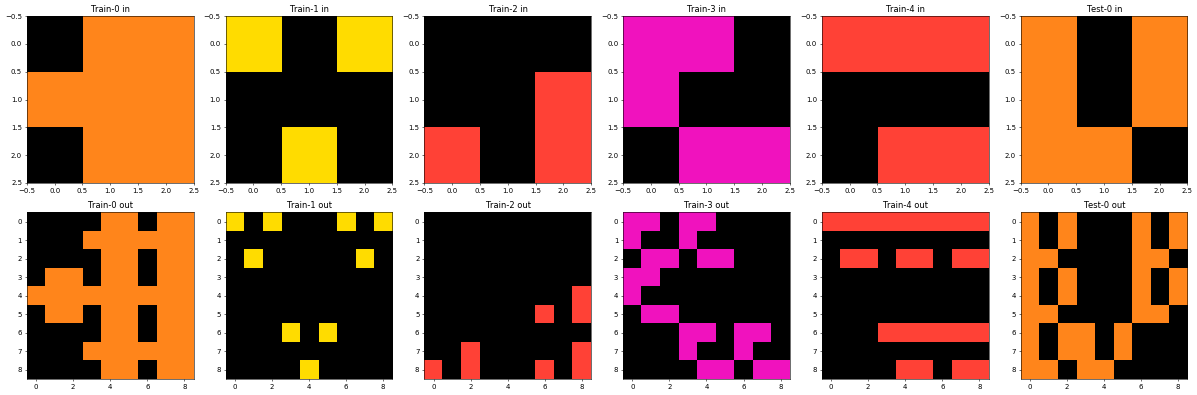

001 data\training\00d62c1b.json


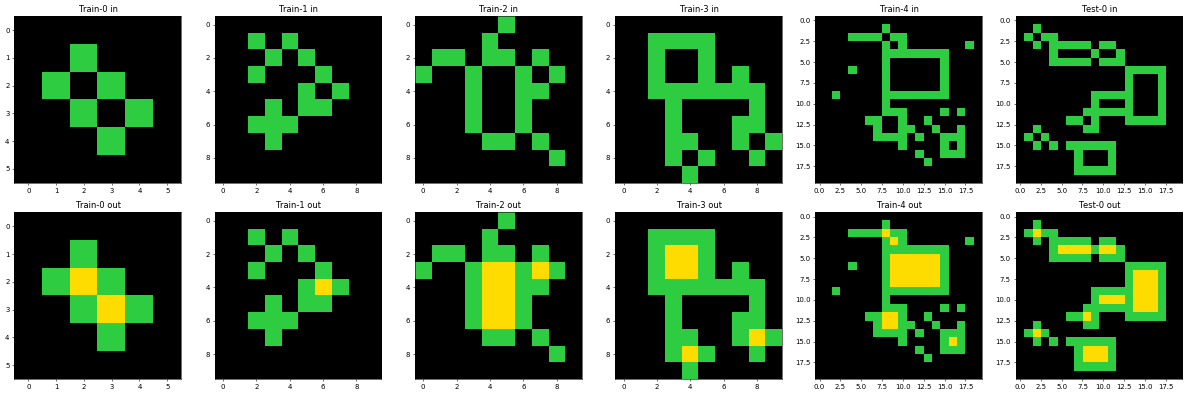

002 data\training\017c7c7b.json


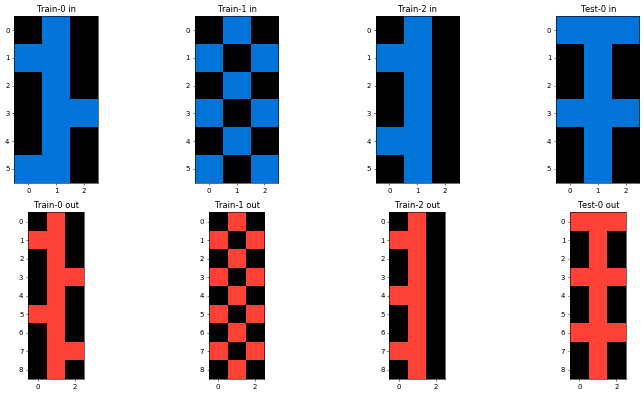

In [12]:
#plotting the first three training tasks.
for i, json_path in enumerate(training_tasks[:3]):   # can change to evaluation_tasks or test_tasks to view the evaluation and test task
    
    task_file = str(training_path / json_path)       # can change to evaluation_path or test_path to view the evaluation and test task

    with open(task_file, 'r') as f:
        task = json.load(f)

    print(f"{i:03d}", task_file)
    plot_task(task)

# PROVE

In [168]:
task_file = str(training_path / training_tasks[0])       # can change to evaluation_path or test_path to view the evaluation and test task

with open(task_file, 'r') as f:
    task = json.load(f)

In [169]:
tf.one_hot(task['train'][0]['input'], 10)

<tf.Tensor: shape=(3, 3, 10), dtype=float32, numpy=
array([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]],

       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]]], dtype=float32)>

In [170]:
ten=tf.one_hot(task['train'][0]['input'], 10)

In [171]:
tf.math.argmax(ten, axis=-1)

<tf.Tensor: shape=(3, 3), dtype=int64, numpy=
array([[0, 7, 7],
       [7, 7, 7],
       [0, 7, 7]], dtype=int64)>

In [172]:
pro=tf.constant(task['train'][0]['input'])
tf.where(pro==0, 0, 1)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[0, 1, 1],
       [1, 1, 1],
       [0, 1, 1]])>

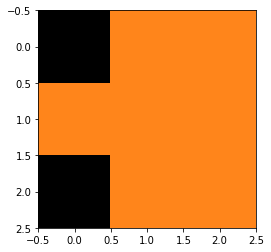

In [182]:
plt.imshow(task['train'][0]['input'], cmap=cmap, norm=norm)

In [19]:
data=[]
label=[]
for pair in task['train']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    #dat=tf.where(dat==0, 0, 1)
    #lab=tf.where(lab==0, 0, 1)
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
trainset = tf.data.Dataset.from_tensor_slices((data, label))

In [185]:
data=[]
label=[]

for pair in task['test']:
    dat=tf.constant(pair['input'])
    lab=tf.constant(pair['output'])
    #dat=tf.where(dat==0, 0, 1)
    #lab=tf.where(lab==0, 0, 1)
    data.append(tf.one_hot(dat, 10))
    label.append(tf.one_hot(lab,10))
valset = tf.data.Dataset.from_tensor_slices((data, label))


In [186]:
for xb, yb in valset.batch(5):
    print(xb[0])
    print(yb[0])
    break

tf.Tensor(
[[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]], shape=(3, 3, 10), dtype=float32)
tf.Tensor(
[[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 0

In [46]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(3,3,10)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(27, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(81, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Reshape((6,6,100)),
    tf.keras.layers.Dense(810, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(810, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(810, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(810, activation='relu'),
    tf.keras.layers.Reshape((9,9,360)),
    tf.keras.layers.Dense(900, activation='relu'),
    tf.keras.layers.Dense(243, activation='relu'),
    tf.keras.layers.Dense(243, activation='relu'),
    tf.keras.layers.Dense(243),
    tf.keras.layers.Dense(90),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
  ])

  optimizer = tf.keras.optimizers.Adam(0.01)

  model.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [217]:
def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, input_shape=(3,3,10), kernel_size=3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(10, kernel_size=3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Conv2D(10, kernel_size=3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.UpSampling2D((3,3)),
    tf.keras.layers.Conv2D(10, kernel_size=3, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [234]:
model=build_model()
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 3, 3, 10)          910       
_________________________________________________________________
batch_normalization_76 (Batc (None, 3, 3, 10)          40        
_________________________________________________________________
re_lu_54 (ReLU)              (None, 3, 3, 10)          0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 3, 3, 10)          910       
_________________________________________________________________
batch_normalization_77 (Batc (None, 3, 3, 10)          40        
_________________________________________________________________
re_lu_55 (ReLU)              (None, 3, 3, 10)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 3, 3, 10)        

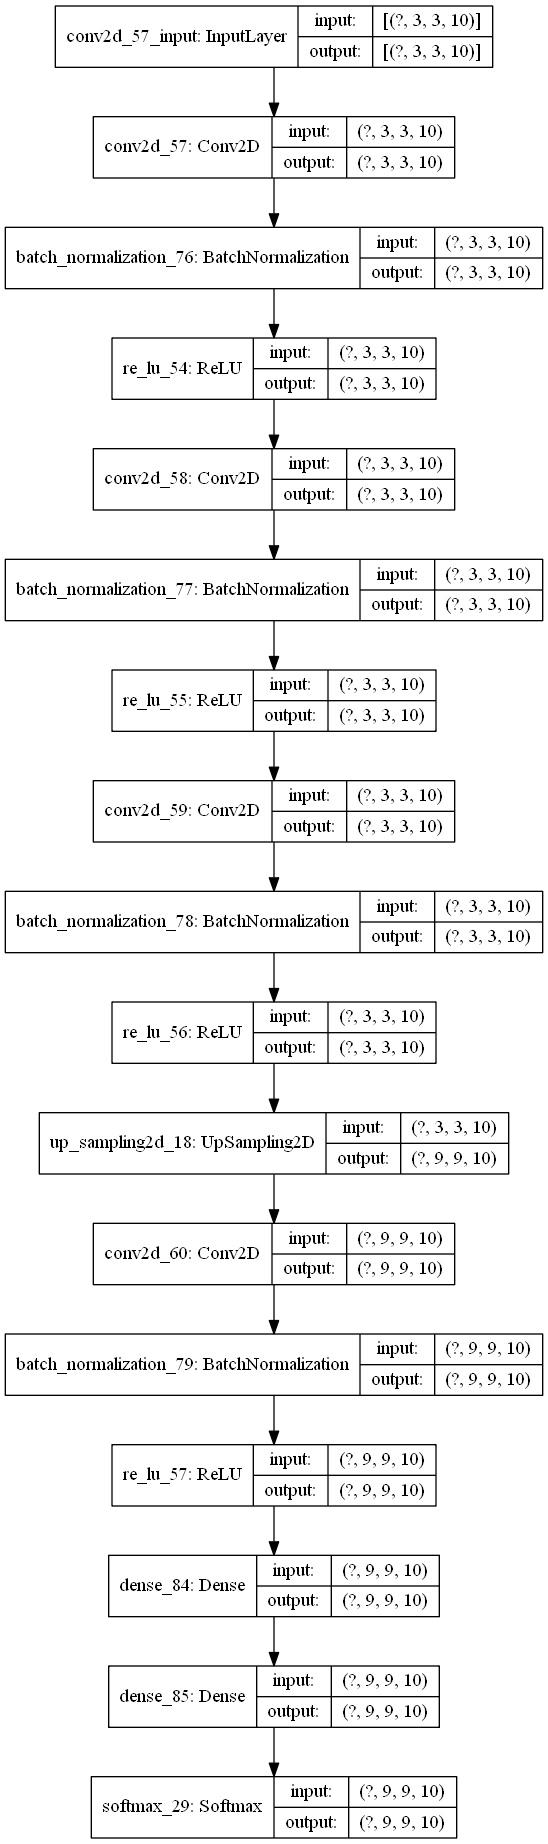

In [235]:
tf.keras.utils.plot_model(model, 'model.png', show_shapes=True, show_layer_names=True)

In [236]:
EPOCHS = 500

history = model.fit(trainset.batch(5),validation_data=valset.batch(1),  epochs=EPOCHS)

Train for 1 steps, validate for 1 steps
Epoch 1/500
1/1 [==============================] - 1s 997ms/step - loss: 0.3277 - mae: 0.1768 - mse: 0.0899 - val_loss: 0.3242 - val_mae: 0.1798 - val_mse: 0.0898
Epoch 2/500
1/1 [==============================] - 0s 30ms/step - loss: 0.3189 - mae: 0.1753 - mse: 0.0883 - val_loss: 0.3238 - val_mae: 0.1798 - val_mse: 0.0898
Epoch 3/500
1/1 [==============================] - 0s 28ms/step - loss: 0.3108 - mae: 0.1737 - mse: 0.0867 - val_loss: 0.3234 - val_mae: 0.1797 - val_mse: 0.0897
Epoch 4/500
1/1 [==============================] - 0s 26ms/step - loss: 0.3037 - mae: 0.1721 - mse: 0.0852 - val_loss: 0.3231 - val_mae: 0.1796 - val_mse: 0.0896
Epoch 5/500
1/1 [==============================] - 0s 29ms/step - loss: 0.2974 - mae: 0.1704 - mse: 0.0837 - val_loss: 0.3228 - val_mae: 0.1796 - val_mse: 0.0896
Epoch 6/500
1/1 [==============================] - 0s 26ms/step - loss: 0.2921 - mae: 0.1689 - mse: 0.0824 - val_loss: 0.3225 - val_mae: 0.1795 - val

Epoch 52/500
1/1 [==============================] - 0s 27ms/step - loss: 0.1716 - mae: 0.1174 - mse: 0.0456 - val_loss: 0.3064 - val_mae: 0.1755 - val_mse: 0.0859
Epoch 53/500
1/1 [==============================] - 0s 26ms/step - loss: 0.1697 - mae: 0.1162 - mse: 0.0450 - val_loss: 0.3059 - val_mae: 0.1753 - val_mse: 0.0857
Epoch 54/500
1/1 [==============================] - 0s 27ms/step - loss: 0.1678 - mae: 0.1150 - mse: 0.0444 - val_loss: 0.3054 - val_mae: 0.1751 - val_mse: 0.0856
Epoch 55/500
1/1 [==============================] - 0s 26ms/step - loss: 0.1659 - mae: 0.1139 - mse: 0.0438 - val_loss: 0.3049 - val_mae: 0.1750 - val_mse: 0.0855
Epoch 56/500
1/1 [==============================] - 0s 26ms/step - loss: 0.1640 - mae: 0.1127 - mse: 0.0431 - val_loss: 0.3044 - val_mae: 0.1748 - val_mse: 0.0853
Epoch 57/500
1/1 [==============================] - 0s 26ms/step - loss: 0.1621 - mae: 0.1116 - mse: 0.0426 - val_loss: 0.3039 - val_mae: 0.1746 - val_mse: 0.0852
Epoch 58/500
1/1 [====

Epoch 103/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0934 - mae: 0.0663 - mse: 0.0229 - val_loss: 0.2825 - val_mae: 0.1636 - val_mse: 0.0776
Epoch 104/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0924 - mae: 0.0657 - mse: 0.0227 - val_loss: 0.2821 - val_mae: 0.1633 - val_mse: 0.0774
Epoch 105/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0913 - mae: 0.0650 - mse: 0.0224 - val_loss: 0.2817 - val_mae: 0.1629 - val_mse: 0.0772
Epoch 106/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0903 - mae: 0.0644 - mse: 0.0222 - val_loss: 0.2814 - val_mae: 0.1626 - val_mse: 0.0770
Epoch 107/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0893 - mae: 0.0637 - mse: 0.0219 - val_loss: 0.2811 - val_mae: 0.1624 - val_mse: 0.0769
Epoch 108/500
1/1 [==============================] - 0s 26ms/step - loss: 0.0883 - mae: 0.0630 - mse: 0.0216 - val_loss: 0.2808 - val_mae: 0.1621 - val_mse: 0.0767
Epoch 109/500
1/

Epoch 153/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0541 - mae: 0.0410 - mse: 0.0129 - val_loss: 0.2709 - val_mae: 0.1479 - val_mse: 0.0708
Epoch 154/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0535 - mae: 0.0406 - mse: 0.0128 - val_loss: 0.2709 - val_mae: 0.1475 - val_mse: 0.0707
Epoch 155/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0529 - mae: 0.0402 - mse: 0.0126 - val_loss: 0.2708 - val_mae: 0.1471 - val_mse: 0.0706
Epoch 156/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0523 - mae: 0.0398 - mse: 0.0124 - val_loss: 0.2707 - val_mae: 0.1466 - val_mse: 0.0704
Epoch 157/500
1/1 [==============================] - 0s 27ms/step - loss: 0.0517 - mae: 0.0394 - mse: 0.0123 - val_loss: 0.2706 - val_mae: 0.1462 - val_mse: 0.0703
Epoch 158/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0511 - mae: 0.0390 - mse: 0.0121 - val_loss: 0.2705 - val_mae: 0.1458 - val_mse: 0.0702
Epoch 159/500
1/

Epoch 203/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0304 - mae: 0.0242 - mse: 0.0063 - val_loss: 0.2689 - val_mae: 0.1340 - val_mse: 0.0686
Epoch 204/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0301 - mae: 0.0240 - mse: 0.0062 - val_loss: 0.2689 - val_mae: 0.1339 - val_mse: 0.0686
Epoch 205/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0298 - mae: 0.0237 - mse: 0.0061 - val_loss: 0.2689 - val_mae: 0.1337 - val_mse: 0.0686
Epoch 206/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0295 - mae: 0.0235 - mse: 0.0060 - val_loss: 0.2688 - val_mae: 0.1336 - val_mse: 0.0686
Epoch 207/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0291 - mae: 0.0233 - mse: 0.0059 - val_loss: 0.2688 - val_mae: 0.1334 - val_mse: 0.0686
Epoch 208/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0288 - mae: 0.0230 - mse: 0.0059 - val_loss: 0.2689 - val_mae: 0.1332 - val_mse: 0.0686
Epoch 209/500
1/

Epoch 253/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0186 - mae: 0.0148 - mse: 0.0037 - val_loss: 0.2782 - val_mae: 0.1273 - val_mse: 0.0710
Epoch 254/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0184 - mae: 0.0147 - mse: 0.0037 - val_loss: 0.2785 - val_mae: 0.1272 - val_mse: 0.0711
Epoch 255/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0183 - mae: 0.0145 - mse: 0.0036 - val_loss: 0.2789 - val_mae: 0.1271 - val_mse: 0.0711
Epoch 256/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0181 - mae: 0.0144 - mse: 0.0036 - val_loss: 0.2793 - val_mae: 0.1269 - val_mse: 0.0712
Epoch 257/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0180 - mae: 0.0143 - mse: 0.0036 - val_loss: 0.2796 - val_mae: 0.1268 - val_mse: 0.0713
Epoch 258/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0179 - mae: 0.0142 - mse: 0.0035 - val_loss: 0.2797 - val_mae: 0.1267 - val_mse: 0.0713
Epoch 259/500
1/

Epoch 303/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0121 - mae: 0.0101 - mse: 0.0022 - val_loss: 0.3202 - val_mae: 0.1230 - val_mse: 0.0786
Epoch 304/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0120 - mae: 0.0100 - mse: 0.0022 - val_loss: 0.3214 - val_mae: 0.1230 - val_mse: 0.0788
Epoch 305/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0119 - mae: 0.0099 - mse: 0.0022 - val_loss: 0.3228 - val_mae: 0.1230 - val_mse: 0.0790
Epoch 306/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0118 - mae: 0.0098 - mse: 0.0021 - val_loss: 0.3241 - val_mae: 0.1230 - val_mse: 0.0792
Epoch 307/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0117 - mae: 0.0098 - mse: 0.0021 - val_loss: 0.3256 - val_mae: 0.1229 - val_mse: 0.0794
Epoch 308/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0116 - mae: 0.0097 - mse: 0.0021 - val_loss: 0.3275 - val_mae: 0.1227 - val_mse: 0.0797
Epoch 309/500
1/

Epoch 353/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0078 - mae: 0.0067 - mse: 0.0012 - val_loss: 0.3913 - val_mae: 0.1198 - val_mse: 0.0860
Epoch 354/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0078 - mae: 0.0066 - mse: 0.0012 - val_loss: 0.3921 - val_mae: 0.1198 - val_mse: 0.0861
Epoch 355/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0077 - mae: 0.0066 - mse: 0.0012 - val_loss: 0.3932 - val_mae: 0.1199 - val_mse: 0.0863
Epoch 356/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0076 - mae: 0.0065 - mse: 0.0012 - val_loss: 0.3949 - val_mae: 0.1199 - val_mse: 0.0864
Epoch 357/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0076 - mae: 0.0065 - mse: 0.0012 - val_loss: 0.3969 - val_mae: 0.1197 - val_mse: 0.0865
Epoch 358/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0075 - mae: 0.0064 - mse: 0.0011 - val_loss: 0.3989 - val_mae: 0.1195 - val_mse: 0.0866
Epoch 359/500
1/

Epoch 403/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0054 - mae: 0.0047 - mse: 7.5196e-04 - val_loss: 0.4636 - val_mae: 0.1189 - val_mse: 0.0911
Epoch 404/500
1/1 [==============================] - 0s 29ms/step - loss: 0.0053 - mae: 0.0046 - mse: 7.4490e-04 - val_loss: 0.4650 - val_mae: 0.1189 - val_mse: 0.0912
Epoch 405/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0053 - mae: 0.0046 - mse: 7.3894e-04 - val_loss: 0.4659 - val_mae: 0.1189 - val_mse: 0.0912
Epoch 406/500
1/1 [==============================] - 0s 31ms/step - loss: 0.0053 - mae: 0.0046 - mse: 7.2906e-04 - val_loss: 0.4669 - val_mae: 0.1190 - val_mse: 0.0913
Epoch 407/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0052 - mae: 0.0045 - mse: 7.1258e-04 - val_loss: 0.4679 - val_mae: 0.1190 - val_mse: 0.0913
Epoch 408/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0051 - mae: 0.0045 - mse: 6.9219e-04 - val_loss: 0.4690 - val_mae: 0.1190 - val_mse:

Epoch 452/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0034 - mae: 0.0031 - mse: 3.1923e-04 - val_loss: 0.5260 - val_mae: 0.1204 - val_mse: 0.0939
Epoch 453/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0034 - mae: 0.0031 - mse: 3.1641e-04 - val_loss: 0.5276 - val_mae: 0.1204 - val_mse: 0.0939
Epoch 454/500
1/1 [==============================] - 0s 32ms/step - loss: 0.0034 - mae: 0.0031 - mse: 3.1398e-04 - val_loss: 0.5290 - val_mae: 0.1203 - val_mse: 0.0939
Epoch 455/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0034 - mae: 0.0031 - mse: 3.1214e-04 - val_loss: 0.5302 - val_mae: 0.1203 - val_mse: 0.0939
Epoch 456/500
1/1 [==============================] - 0s 30ms/step - loss: 0.0033 - mae: 0.0030 - mse: 3.1012e-04 - val_loss: 0.5313 - val_mae: 0.1203 - val_mse: 0.0940
Epoch 457/500
1/1 [==============================] - 0s 28ms/step - loss: 0.0033 - mae: 0.0030 - mse: 3.0822e-04 - val_loss: 0.5326 - val_mae: 0.1203 - val_mse:

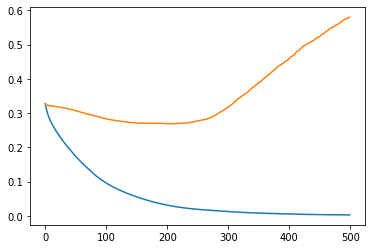

In [237]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

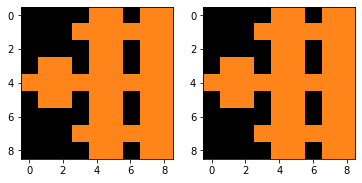

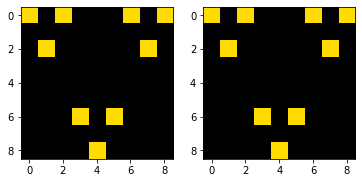

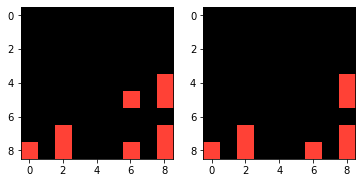

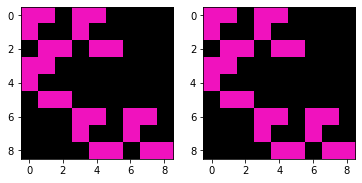

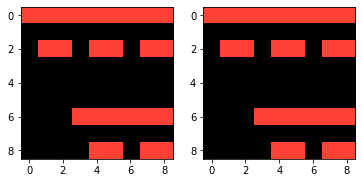

In [238]:
for xb, yb in trainset.batch(5).take(1):
    for i in range(0,5):
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,2,1)
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,2,2)
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()

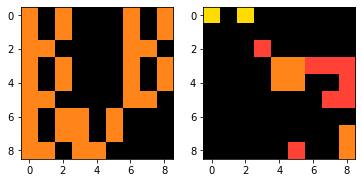

In [239]:
for xb, yb in valset.batch(1):
    for i in range(0,1):
        true=tf.math.argmax(yb[i], axis=-1)
        pred=tf.math.argmax(model.predict(xb)[i], axis=-1)
        plt.subplot(1,2,1)
        plt.imshow(true, cmap=cmap, norm=norm)
        plt.subplot(1,2,2)
        plt.imshow(pred, cmap=cmap, norm=norm)
        plt.show()